# **Sentiment Analysis for Entresto**
____

Author: **Daniel Eduardo López**

<font size="-1"><a href="https://www.linkedin.com/in/daniel-eduardo-lopez">LinkedIn</a> | <a href="https://github.com/DanielEduardoLopez">GitHub </a></font>

**5 Jan 2025**

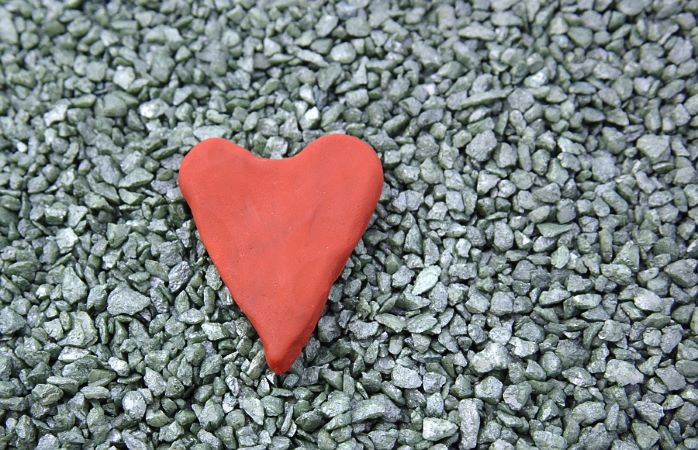


<font size="-1">Image Credit: <a href="https://www.freeimages.com/photo/heart-1168044">jordifa</a> from <a href="https://www.freeimages.com/">FreeImages</a>.</font>

___
## **Table of Contents**
___

1. [**Introduction**](#intro)<br>
    1.1 [Background](#background)<br>
    1.2 [General Objective](#objective)<br>
    1.3 [Research Question](#question)<br>
    1.4 [Hypothesis](#hypothesis)<br>
    1.5 [Methodology](#methodology)<br>
    1.6 [Notebook's Goal](#goal)<br>
2. [**Data Collection**](#collection)<br>
3. [**Data Exploration**](#exploration)<br>
    3.1 [Data Description](#description)<br>
    3.2 [Data Quality](#quality)<br>
    3.3 [Initial Data Analysis](#ida)<br>    
4. [**Data Preparation**](#preparation)<br>
    4.1 [Data Selection](#selection)<br>
    4.2 [Attributes Renaming](#selection)<br>
    4.3 [Data Types Adjustment](#datatypes)<br>
    4.4 [Missing Values Handling](#missing_values)<br>
    4.5 [Derived Attributes Construction](#derived_attributes)<br>
    4.6 [Data Aggregation](#aggregation)<br>
    4.7 [Data Integration](#integration)<br>
    4.8 [Predictors and Response Split](#split)<br>
5. [**Exploratory Data Analysis**](#eda)<br>
    5.1 [Statistical Measures](#statistical_measures)<br>
    5.2 [Time Patterns](#time_patterns)<br>
    5.3 [Distributions and Relationships](#dist_rel)<br>
    5.4 [Correlations](#correlations)<br>
    5.5 [Differencing](#diff)<br>
6. [**Data Modeling**](#modeling)<br>
    6.1 [Pending](#ses_model)<br>
7. [**Evaluation**](#modeling)<br>
    7.1 [Pending](#models_ranking)<br>
8. [**Conclusions**](#conclusions)<br>
9. [**References**](#references)<br>

<a class="anchor" id="intro"></a>
___
## **1. Introduction**
___

### **1.1 Background** <a class="anchor" id="intro"></a>

Entresto&trade; is a medicine used to treat adults with chronic heart failure who have symptoms of the disease and reduced ejection fraction to help reduce the risk of death and hospitalization. It contains the active substances sacubitril and valsartan. This medicine is available as tablets and granules to be taken by mouth twice a day [(European Medicines Agency, 2023)](#ema).

Collecting the opinions and experiences from the patients with a given medicine represents an important task for the drug manufacturer and regulatory agencies. In this sense, Natural Language Processing (NLP), understood as the programming of computers for processing and
analysing large amounts of natural language data, and the web, as a readily available source of information [(Rogel-Salazar, 2020)](#rogel), could be used as a feasible solution.

Sentiment analysis is the study of people's opinions, sentiments, appraisals, attitudes, and emotions expressed in written text towards an entity using NLP [(Bing, 2015)](#bing). It is commonly used to classify a sentiment or opinion as positive, negative, or neutral; and it is valuable to extract and exploit information from social media as its most important insight "is what people talk about and what their opinions are" [(Bing, 2015)](#bing).

Although several algorithms and approaches exist to perform sentiment analysis, such as supervised techniques using machine learning or custom score functions, it was decided to use a **lexicon-based approach** [(Medhat, Hassan & Korashy, 2014)](#medhat), which consists of lists of positive and negative words that occur frequently in product reviews that serves to calculate the sentiment score in a document [(Bing, 2015)](#bing). The lexicon-based approach was selected because, unlike machine learning models, it does not require labeled training data. 

In this context, the purpose of the present study is to perform a sentiment analysis on a sample of social media data about Entresto&trade;.

### **1.2 General Objective** <a class="anchor" id="objective"></a>

To extract the opinions from patients on a sample of social media about Entresto&trade;.

### **1.3 Research question** <a class="anchor" id="question"></a>

What are the opinions from patients on a sample of social media about Entresto&trade;.

### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>

The opinions from patients on a sample of social media about Entresto&trade; are positive.

### **1.5 Methodology** <a class="anchor" id="methodology"></a>

The methodology of the present study is based on the CRISP-DM [(Chapman et al., 2000)](#chapman) framework and Rollin’s *Foundational Methodology for Data Science* [(Rollins, 2015)](#rollins):

1. **Analytical approach**: Lexicon-based analysis.
2. **Data requirements**: Text data with comments from patients in English.
3. **Data collection**: Sample taken from <a href="https://www.reddit.com/">Reddit</a>.
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data was cleaned and prepared by performing steps of cleaning, tokenization, POS tagging, stopwords removal, and stem words retrieval using NLTK.
6. **Exploratory Data Analysis**: Statistical measures were assessed using Python 3 and its libraries Pandas, Matplotlib, and Seaborn.
7. **Data modeling**: Rule-based sentiment analysis using TextBlob.
8. **Evaluation**: No evaluation was performed as lexicon-based analysis is an unsupervised approach [(Bing, 2015)](#bing).

### **1.6 Notebook's Goal** <a class="anchor" id="goal"></a>

In this context, the purpose of the present notebook is to collect, explore, prepare, and analyze the text data for Entresto&trade;.

In [1]:
# Loading requirements file
# %pip install -r requirements.txt

In [2]:
# Libraries installation
# %pip install ipykernel
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install nltk
# %pip install -U textblob
# %pip install beautifulsoup4
# %pip install lxml
# %pip install html5lib

In [3]:
# Libraries importation
import warnings
import sys
sys.path.insert(1, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib_inline.backend_inline
import seaborn as sns
import nltk
from textblob import TextBlob

import src.scraping as scraping

In [4]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"

# Disabling warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="collection"></a>
___
## **2. Data Collection**
___


Data was collected on October 20, 2024, from <a href="https://www.reddit.com/">Reddit</a>, under the thread *"Entresto -- your experience"*. To recover the whole page with users comments, the extension <a href="https://github.com/gildas-lormeau/SingleFile">SingleFile</a> was used on a Mozilla FireFox web browser.

In [5]:
html_file_path = '../data/raw/raw_data.html'

raw_str_with_html_tags = scraping.read_html(html_file_path, tag='div', id='-post-rtjson-content')
raw_str = scraping.remove_html_tags(raw_str_with_html_tags)
raw_str[0:10]

[' My EF went from &lt;10% to 50â€“55% in about 15 months with Entresto, Metoprolol Succinate and Farxiga. My copay for a 90-day supply of Entresto is $75 but Entresto\'s co-pay savings program reduces that to only $10 per 90 days.  Novartis offers three types of assistance:  Everyone is eligible for a one-time free 30-day supply of Entresto  People with commercial insurance (employer-provided and marketplace plans) are eligible for a co-pay assistance card which will reduce co-pay/co-insurance to as little as $10 per fill (up to a maximum $3250 per year including the free 30-days, if you use that)  People without prescription coverage can apply for assistance through the Novartis patient assistance program (I assume income limits apply but don\'t know the details)  Information on all of this is available at https://enspiresupport.entresto.com/.  You may want to look for a health insurance plan on healthcare.gov. You may find the tax credit covers much or all of your premium but even w

<a class="anchor" id="references"></a>
___
## **9. References**
___

* <a class="anchor" id="bing"></a>**Bing, L. (2015).** *Sentiment analysis: mining opinions, sentiments, and emotions*. Cambridge University Press.
* <a class="anchor" id="chapman"></a>**Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000)**. *CRISP-DM 1.0: Step-by-step data mining guide*. CRISP-DM consortium. https://api.semanticscholar.org/CorpusID:59777418
* <a class="anchor" id="ema"></a>**European Medicines Agency (2023).** *Entresto (sacubitril / valsartan)*. https://www.ema.europa.eu/en/documents/overview/entresto-epar-summary-public_en.pdf
* <a class="anchor" id="medhat"></a>**Medhat, W., Hassan, A. & Korashy, H. (2014).** Sentiment analysis algorithms and applications:
A survey. *Ain Shams Engineering Journal*. 5: 1093-1113. http://dx.doi.org/10.1016/j.asej.2014.04.011 
* <a class="anchor" id="rogel"></a>**Rogel-Salazar, J. (2020).** *Advanced Data Science and Analytics with Python*. CRC Press.
* <a class="anchor" id="rollins"></a> **Rollins, J. B. (2015)**. *Foundational Methodology for Data Science*. Somers: IBM Corporation. https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF